In [ ]:
! pip install --user matplotlib

# Demo

The sample data are 100 samples from the FordA dataset of the UCR archive:

`Yanping Chen, Eamonn Keogh, Bing Hu, Nurjahan Begum, Anthony Bagnall, Abdullah Mueen and Gustavo Batista (2015). The UCR Time Series Classification Archive. URL www.cs.ucr.edu/~eamonn/time_series_data/`.

In [1]:
import numpy
import random
from matplotlib import pyplot

import os
import sys
sys.path.insert(0, os.path.abspath('../'))


Load the samples:

In [2]:
data = numpy.load(open('fordA_sample.npy', 'rb'))

In [3]:
def argmin(iterable):
    return min(enumerate(iterable), key=lambda x: x[1])[0]

Get criteria time series (NOTE: Here we operate on the sums of the values for each time series, not the time series itself):

Text(0.5, 1.0, 'Criteria Time Series')

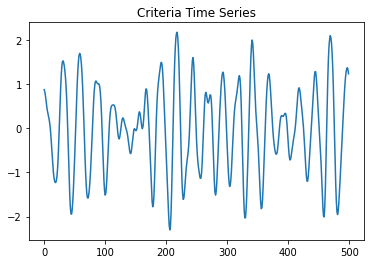

In [4]:
# calculate the mean over all time series
mean_over_ts = sum([numpy.sum(ts) for ts in data]) / len(data)
# get the time series whose sum is closest to the mean sum ==> the criteria time series
i_criteria = argmin([abs(numpy.sum(ts) - mean_over_ts) for ts in data])
criteria_ts = data[i_criteria]
pyplot.plot(criteria_ts)
pyplot.title("Criteria Time Series")

Sort time series according to the distance to the criteria time series (NOTE: Here we operate on the euclidean distances between the time series and the criteria time series):

In [5]:
# here numpy.linalg.norm calculates the euclidean distance between each time series and the criteria time series
ordered_dists_ts = sorted([(i, numpy.linalg.norm(ts - criteria_ts)) for i, ts in enumerate(data)], key=lambda x: x[1])
adj_discrepancies = [abs(ts_dist[1] - ordered_dists_ts[i + 1][1]) for i, ts_dist in enumerate(ordered_dists_ts[:-1])]

Calculate the standard deviation of the adjacent discrepancies:

In [6]:
# ignore the first, since it is the distance of the criteria to itself and the first real distance. This will be much higher than all the adjacent discrepancies
std = numpy.std(adj_discrepancies[1:])
std_split = 1.5

Now we can calculate the split points:

In [7]:
split_points = [i for i, discr in enumerate(adj_discrepancies) if discr >= std * std_split]

We can also visualize the split points to get an indication for where to look for a good value of `std_split`:

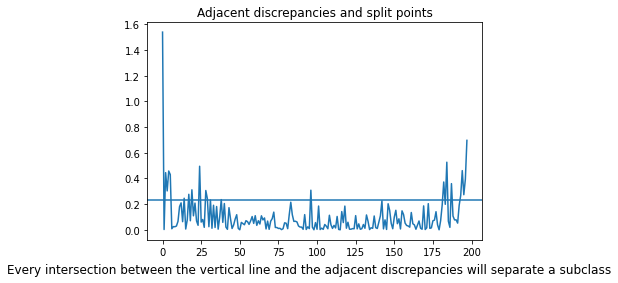

In [8]:
pyplot.plot(adj_discrepancies[1:])
pyplot.axhline(y=std * std_split)
pyplot.title("Adjacent discrepancies and split points")
text = pyplot.figtext(0.5, 0.01, "Every intersection between the vertical line and the adjacent discrepancies will separate a subclass", wrap=True, horizontalalignment='center', fontsize=12)